In [1]:
#Link to DataSet 
#https://www.kaggle.com/datasets/bartoszpieniak/poland-cars-for-sale-dataset

# Over 200,000 adverts scraped from one of the poland's most popular car ads site. (Otomotto)

In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_csv("Data/Car_sale_ads.csv", index_col="Index")

# As you can see we have some empty cells

<AxesSubplot:ylabel='Index'>

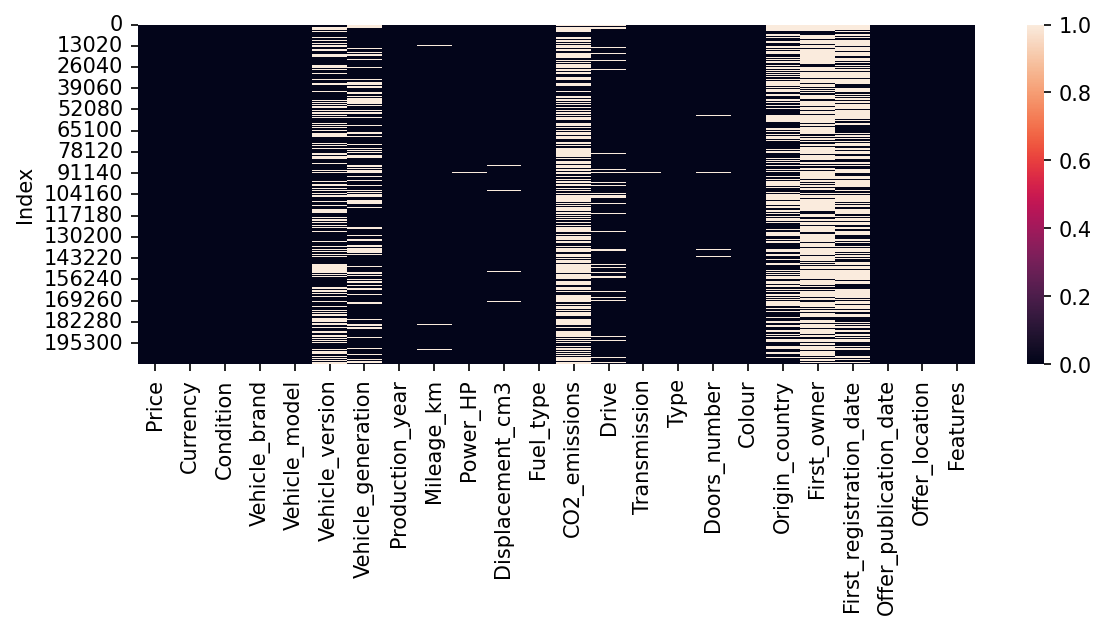

In [10]:
plt.figure(figsize=(9, 3), dpi=150)
sns.heatmap(df.isnull())

# Most of the columns Vehicle_version ,Vehicle_gen, co2_emission, Origin_country, first_owner, First_registraion_date are empty so I decided to remove them

In [11]:
df.drop(["Vehicle_generation", "Vehicle_version", "Vehicle_version", "CO2_emissions",
         "Origin_country", "First_owner", "First_registration_date"], axis=1, inplace=True)

1:80: E501 line too long (85 > 79 characters)
2:80: E501 line too long (91 > 79 characters)


<AxesSubplot:ylabel='Index'>

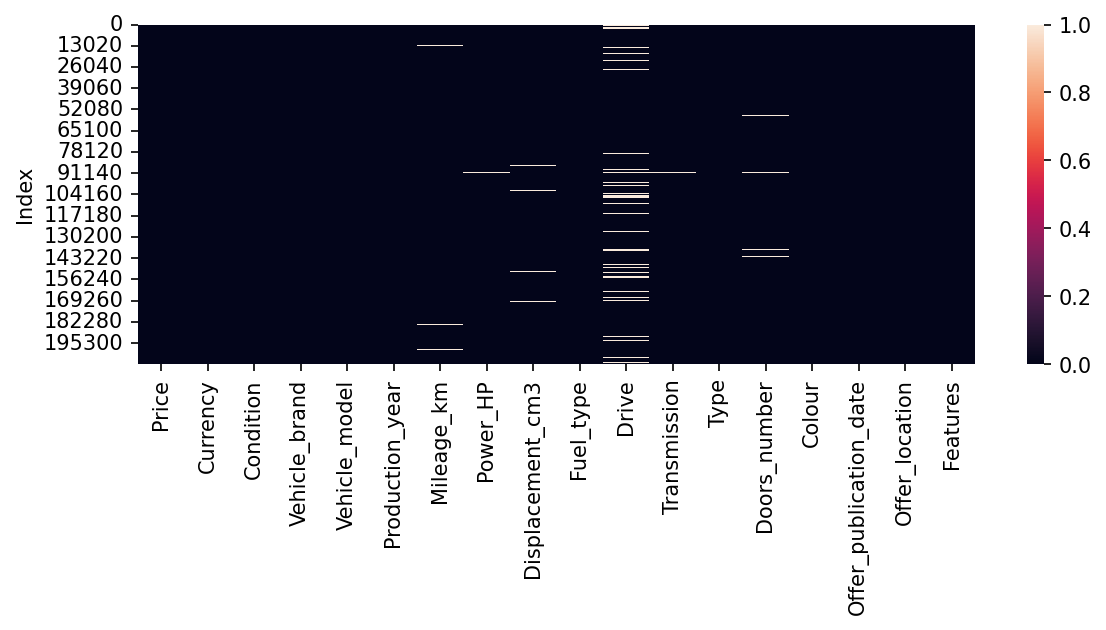

1:26: E231 missing whitespace after ','


In [12]:
plt.figure(figsize=(9, 3), dpi=150)
sns.heatmap(df.isnull())

<AxesSubplot:ylabel='Index'>

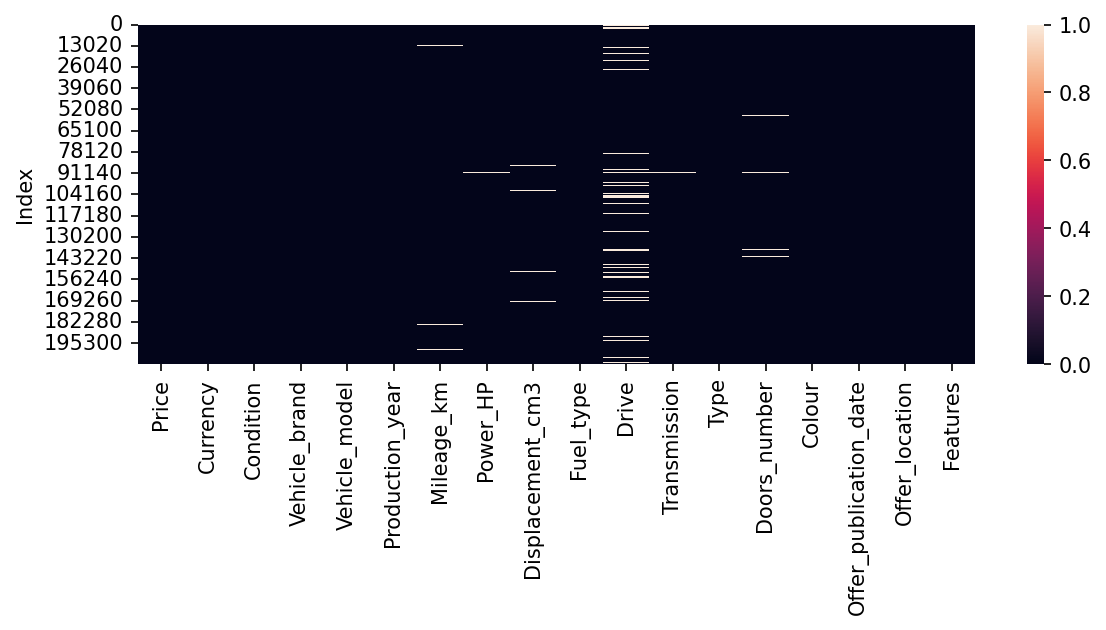

In [13]:
plt.figure(figsize=(9, 3), dpi=150)
sns.heatmap(df.isnull())

# Dealing with Features (Separate them to separate columns)

In [14]:
df2 = pd.read_csv("Data/Car_sale_ads.csv", index_col="Index")

In [15]:
index_to_drop = df2[df2["Features"] == "[]"].index

In [18]:
# Spliting function

In [19]:
def spliting_features(x):
    y = x.split(",")
    y_list = []
    for element in y: 
        y_list.append(element.replace("[", "").replace("'", "").replace("]", "").replace(" ", ""))
    
    return y_list

4:22: W291 trailing whitespace
5:80: E501 line too long (98 > 79 characters)
6:1: W293 blank line contains whitespace


In [20]:
df2["Features"] = df2["Features"].apply(spliting_features)

In [25]:
unique_list = []


def uni(x):
    for el in x:
        if el not in unique_list:
            unique_list.append(el)

In [26]:
df2["Features"].apply(uni)

Index
0         None
1         None
2         None
3         None
4         None
          ... 
208299    None
208300    None
208301    None
208302    None
208303    None
Name: Features, Length: 208304, dtype: object

In [23]:
df2.shape

(208304, 24)

In [27]:
unique_list = unique_list[1:]

In [28]:
unique_list

['ABS',
 'Electricfrontwindows',
 'Driversairbag',
 'Powersteering',
 'ASR(tractioncontrol)',
 'Rearviewcamera',
 'Heatedsidemirrors',
 'CD',
 'Electricallyadjustablemirrors',
 'Passengersairbag',
 'Alarm',
 'Bluetooth',
 'Automaticairconditioning',
 'Airbagprotectingtheknees',
 'Centrallocking',
 'Immobilizer',
 'Factoryradio',
 'Alloywheels',
 'Rainsensor',
 'On-boardcomputer',
 'Multifunctionsteeringwheel',
 'AUXsocket',
 'Xenonlights',
 'USBsocket',
 'MP3',
 'ESP(stabilizationofthetrack)',
 'Frontsideairbags',
 'Rearparkingsensors',
 'Isofix',
 'Aircurtains',
 'Tintedwindows',
 'Daytimerunninglights',
 'Rearsideairbags',
 'Foglights',
 'Twilightsensor',
 'GPSnavigation',
 'LEDlights',
 'Manualairconditioning',
 'Start-Stopsystem',
 'Electrochromicrearviewmirror',
 'Velorupholstery',
 'Electrochromicsidemirrors',
 'SDsocket',
 'Dualzoneairconditioning',
 'Adjustablesuspension',
 'Panoramicroof',
 'Sunroof',
 'Frontparkingsensors',
 'Heatedfrontseats',
 'Leatherupholstery',
 'Electri

In [29]:
zero_data = np.zeros((208304, 70))

In [34]:
uni_df = pd.DataFrame(columns=unique_list, data=zero_data)

In [35]:
uni_df.drop(index_to_drop, axis=0, inplace=True)

In [36]:
uni_df

,ABS,Electricfrontwindows,Driversairbag,Powersteering,ASR(tractioncontrol),Rearviewcamera,Heatedsidemirrors,CD,Electricallyadjustablemirrors,Passengersairbag,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
uni_df = pd.read_csv("Data/Very_Important_DataFrame.csv", index_col=0)

In [42]:
uni_df.drop(index_to_drop, axis=0, inplace=True)

In [43]:
df.drop("Features", axis=1, inplace=True)

In [43]:
df.drop(index_to_drop, axis=0, inplace=True)

In [44]:
df = pd.concat([df, uni_df], axis=1)

In [45]:
df

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
5,62950,PLN,Used,Abarth,595,2016,46060.0,180.0,1368.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
7,69900,PLN,Used,Abarth,500,2019,20000.0,145.0,1368.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208270,24900,PLN,Used,Volvo,V70,2008,262000.0,136.0,1998.0,Diesel,...,0,0,0,0,0,1,0,1,0,0
208271,154480,PLN,New,Volvo,XC 60,2021,5.0,197.0,1969.0,Gasoline,...,0,0,0,0,0,1,0,0,0,0
208272,6600,PLN,Used,Volvo,S40,2000,192470.0,123.0,1800.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
208274,3500,PLN,Used,Wartburg,1.3,1991,46400.0,58.0,1272.0,Gasoline + LPG,...,0,0,0,0,0,0,0,1,0,0


In [46]:
df.columns

Index(['Price', 'Currency', 'Condition', 'Vehicle_brand', 'Vehicle_model',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'Drive', 'Transmission', 'Type', 'Doors_number', 'Colour',
       'Offer_publication_date', 'Offer_location', 'Features', 'ABS',
       'Electricfrontwindows', 'Driversairbag', 'Powersteering',
       'ASR(tractioncontrol)', 'Rearviewcamera', 'Heatedsidemirrors', 'CD',
       'Electricallyadjustablemirrors', 'Passengersairbag', 'Alarm',
       'Bluetooth', 'Automaticairconditioning', 'Airbagprotectingtheknees',
       'Centrallocking', 'Immobilizer', 'Factoryradio', 'Alloywheels',
       'Rainsensor', 'On-boardcomputer', 'Multifunctionsteeringwheel',
       'AUXsocket', 'Xenonlights', 'USBsocket', 'MP3',
       'ESP(stabilizationofthetrack)', 'Frontsideairbags',
       'Rearparkingsensors', 'Isofix', 'Aircurtains', 'Tintedwindows',
       'Daytimerunninglights', 'Rearsideairbags', 'Foglights',
       'Twilightsensor', 'GP

<AxesSubplot:>

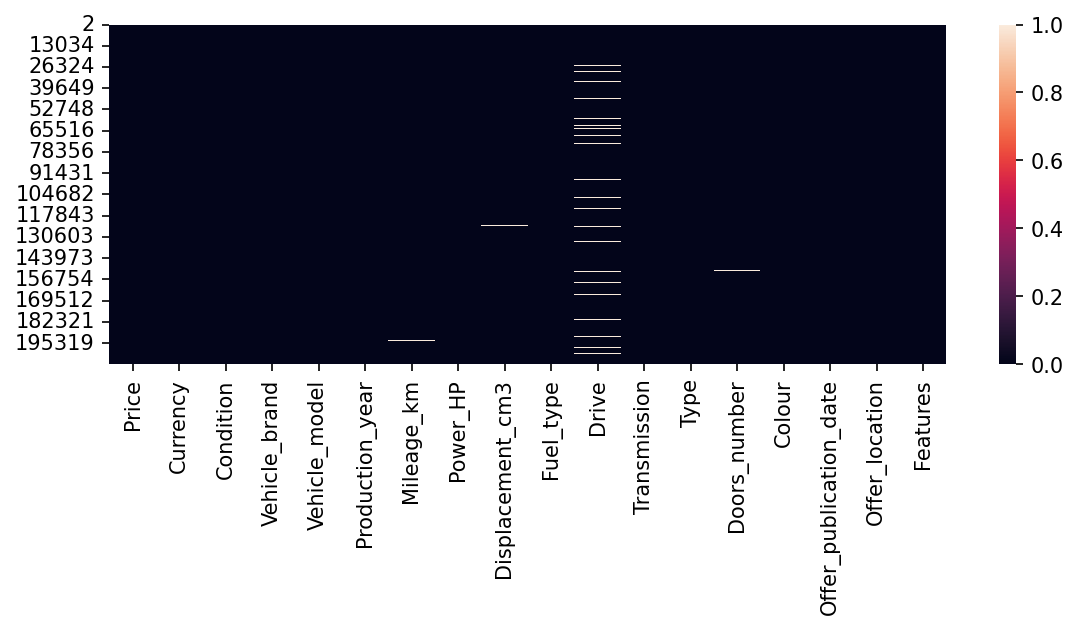

In [47]:
plt.figure(figsize=(9, 3), dpi=150)
sns.heatmap(df.drop(unique_list, axis=1).isnull())

In [167]:
df.describe()

,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,ABS,Electricfrontwindows,Driversairbag,Powersteering,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
count,1.949670e+05,194967.000000,1.943500e+05,194597.000000,193364.000000,193916.000000,194967.000000,194967.000000,194967.000000,194967.000000,...,194967.000000,194967.000000,194967.000000,194967.000000,194967.000000,194967.000000,194967.000000,194967.000000,194967.000000,194967.000000
mean,6.167215e+04,2012.351777,1.400713e+05,150.621227,1866.909487,4.657161,0.955972,0.930911,0.925198,0.925726,...,0.080075,0.037442,0.052855,0.050875,0.016952,0.308960,0.127370,0.151451,0.188586,0.044495
std,8.224584e+04,6.179379,4.789686e+05,74.908144,699.616549,0.745068,0.205158,0.253605,0.263073,0.262217,...,0.271410,0.189843,0.223745,0.219744,0.129090,0.462066,0.333388,0.358489,0.391180,0.206192
min,5.000000e+02,1945.000000,1.000000e+00,1.000000,400.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.790000e+04,2008.000000,5.500000e+04,105.000000,1461.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.550000e+04,2013.000000,1.454140e+05,136.000000,1798.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.499900e+04,2017.000000,2.060000e+05,170.000000,1997.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,6.999000e+06,2021.000000,2.065492e+08,1398.000000,8285.000000,55.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Now we have some nan in Mileage_km ,Displacement_cm3, fuel_type, transmision and doors_number columns.

# I decided to fill the gaps in the drive column with the value of Front wheels

In [48]:
df["Drive"].value_counts()

Front wheels                    135427
Rear wheels                      16670
4x4 (permanent)                  15840
4x4 (attached automatically)     14429
4x4 (attached manually)           2642
Name: Drive, dtype: int64

In [50]:
df["Drive"].fillna("Front wheels", inplace=True)

In [51]:
df["Drive"].value_counts()

Front wheels                    145386
Rear wheels                      16670
4x4 (permanent)                  15840
4x4 (attached automatically)     14429
4x4 (attached manually)           2642
Name: Drive, dtype: int64

<AxesSubplot:>

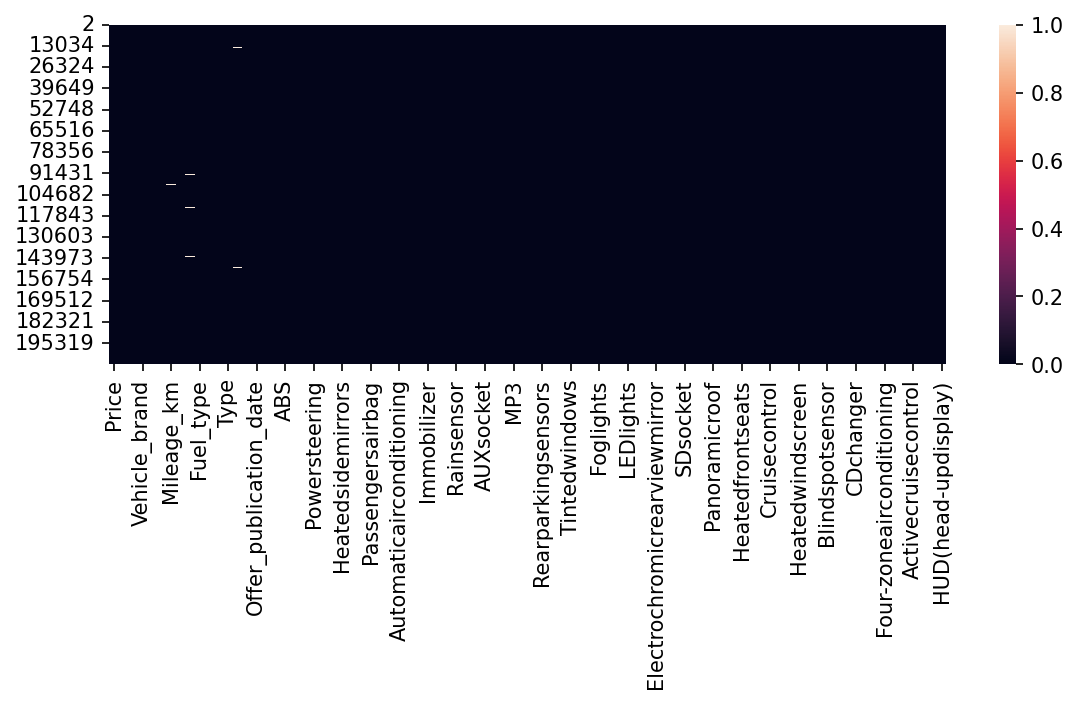

In [52]:
plt.figure(figsize=(9, 3), dpi=150)
sns.heatmap(df.isnull())

# Only a small part of our data remained with empty values so I decided to delete them

In [53]:
df.drop(unique_list, axis=1).isnull().sum()

Price                        0
Currency                     0
Condition                    0
Vehicle_brand                0
Vehicle_model                0
Production_year              0
Mileage_km                 617
Power_HP                   370
Displacement_cm3          1603
Fuel_type                    0
Drive                        0
Transmission               240
Type                         0
Doors_number              1051
Colour                       0
Offer_publication_date       0
Offer_location               0
Features                     0
dtype: int64

In [54]:
df2 = df.dropna(how="any")

In [55]:
len(df2)/len(df)

0.9833458995624901

# We delete just 2% of data

In [56]:
df.dropna(how="any", inplace=True)

# Now we don't have any empty cells

<AxesSubplot:>

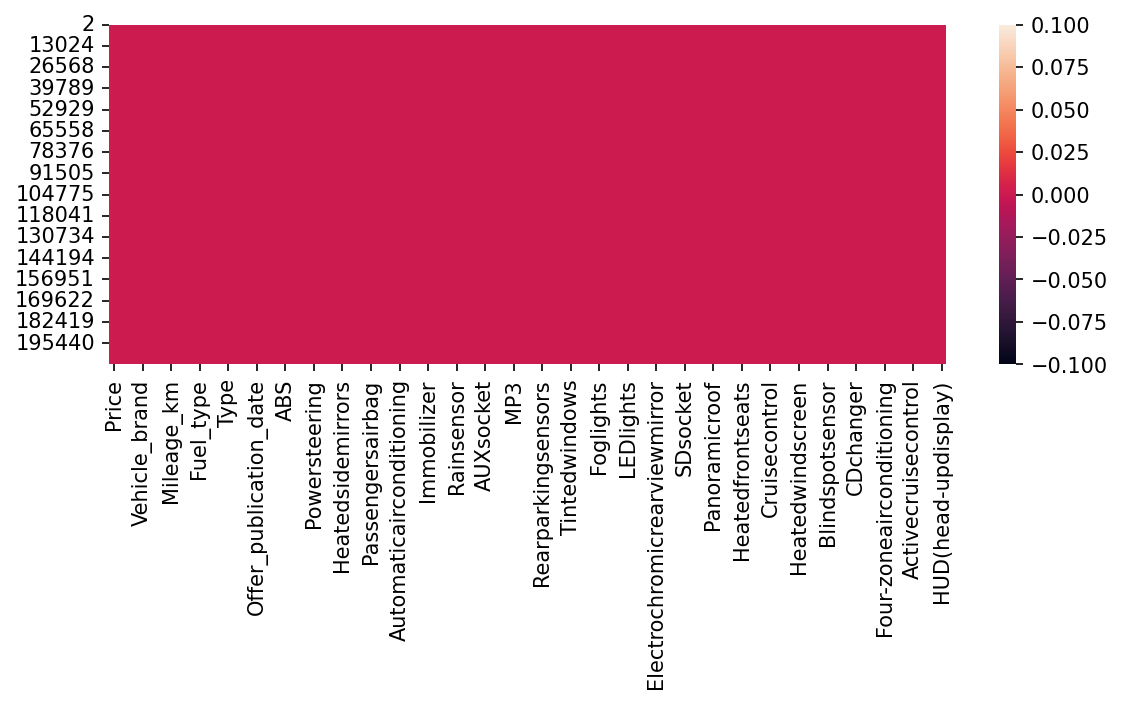

In [57]:
plt.figure(figsize=(9, 3), dpi=150)
sns.heatmap(df.isnull())

# I decided keep just 50 most popular Vehicle brands

In [58]:
popular_brands = df["Vehicle_brand"].value_counts().head(50).index

In [59]:
popular_brands

Index(['Volkswagen', 'Opel', 'BMW', 'Audi', 'Ford', 'Mercedes-Benz', 'Renault',
       'Toyota', 'Škoda', 'Peugeot', 'Citroën', 'Volvo', 'Kia', 'Hyundai',
       'Seat', 'Fiat', 'Nissan', 'Mazda', 'Honda', 'Suzuki', 'Mitsubishi',
       'Jeep', 'Dacia', 'Chevrolet', 'MINI', 'Alfa Romeo', 'Land Rover',
       'Lexus', 'Porsche', 'Jaguar', 'Subaru', 'Chrysler', 'Dodge', 'Saab',
       'Infiniti', 'Smart', 'Lancia', 'SsangYong', 'Cupra', 'Maserati',
       'Cadillac', 'Daihatsu', 'Daewoo', 'DS Automobiles', 'Aixam', 'Isuzu',
       'RAM', 'Lincoln', 'Microcar', 'Abarth'],
      dtype='object')

In [63]:
y = df.iloc[0:2]
y

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0


In [64]:
for i in range(0, len(popular_brands)):
    x = df[df["Vehicle_brand"] == popular_brands[i]]
    y = pd.concat([y, x])

In [65]:
df = y[2:]

In [66]:
df["Vehicle_brand"].value_counts()

Volkswagen        16979
Opel              15413
BMW               15322
Audi              15179
Ford              15069
Mercedes-Benz     10642
Renault           10056
Toyota             9732
Škoda              9611
Peugeot            8329
Citroën            6814
Volvo              5646
Kia                5632
Hyundai            5585
Seat               4650
Fiat               4595
Nissan             4458
Mazda              4326
Honda              3795
Suzuki             2466
Mitsubishi         1836
Jeep               1576
Dacia              1562
Chevrolet          1340
MINI               1294
Alfa Romeo         1232
Land Rover         1082
Lexus               938
Porsche             842
Jaguar              818
Subaru              766
Chrysler            600
Dodge               592
Saab                438
Infiniti            263
Smart               239
Lancia              239
SsangYong           189
Cupra               146
Maserati            144
Cadillac            141
Daihatsu        

In [67]:
popular_models = df["Vehicle_model"].value_counts().head(300).index

In [68]:
most_popular_models = df["Vehicle_model"].value_counts().head(100).index

In [69]:
popular_models

Index(['Astra', 'A4', 'Seria 3', 'Golf', 'Passat', 'Octavia', 'Focus',
       'Seria 5', 'A6', 'Mondeo',
       ...
       'DS4', 'Jimny', 'S3', 'Transit Custom', 'Passat CC', 'Macan',
       'Grand Espace', 'Impreza', 'XE', 'GLK'],
      dtype='object', length=300)

In [70]:
popular_models

Index(['Astra', 'A4', 'Seria 3', 'Golf', 'Passat', 'Octavia', 'Focus',
       'Seria 5', 'A6', 'Mondeo',
       ...
       'DS4', 'Jimny', 'S3', 'Transit Custom', 'Passat CC', 'Macan',
       'Grand Espace', 'Impreza', 'XE', 'GLK'],
      dtype='object', length=300)

In [71]:
len(popular_models)

300

In [72]:
y = df.iloc[0:2]
y

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
132498,19900,PLN,Used,Volkswagen,Other,2005,415000.0,101.0,1900.0,Diesel,...,1,0,0,0,0,0,0,0,0,0
132500,53259,PLN,Used,Volkswagen,Other,2005,126849.0,130.0,2550.0,Diesel,...,0,0,0,0,0,0,0,1,0,0


In [73]:
for i in range(0, len(popular_models)):
    x = df[df["Vehicle_model"] == popular_models[i]]
    y = pd.concat([y, x])

1:17: E231 missing whitespace after ','
3:21: E231 missing whitespace after ','
4:1: W293 blank line contains whitespace


In [74]:
y

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
132498,19900,PLN,Used,Volkswagen,Other,2005,415000.0,101.0,1900.0,Diesel,...,1,0,0,0,0,0,0,0,0,0
132500,53259,PLN,Used,Volkswagen,Other,2005,126849.0,130.0,2550.0,Diesel,...,0,0,0,0,0,0,0,1,0,0
116465,42900,PLN,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,...,0,0,0,0,0,0,0,1,1,0
116466,11900,PLN,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,...,0,0,0,0,0,1,0,0,0,0
116467,25900,PLN,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107242,84500,PLN,Used,Mercedes-Benz,GLK,2012,176000.0,170.0,2143.0,Diesel,...,0,0,0,0,0,1,0,1,1,0
107275,84900,PLN,Used,Mercedes-Benz,GLK,2013,199000.0,170.0,2143.0,Diesel,...,0,0,0,0,0,1,0,0,0,0
107475,68265,PLN,Used,Mercedes-Benz,GLK,2013,250000.0,204.0,2143.0,Diesel,...,0,0,0,0,0,0,1,1,0,0
107479,64900,PLN,Used,Mercedes-Benz,GLK,2010,155000.0,231.0,2999.0,Diesel,...,1,1,0,0,0,1,0,1,0,0


In [75]:
df = y[2:]

In [76]:
y = df.iloc[0:2]

In [77]:
len(most_popular_models)

100

In [78]:
for i in range(0, len(most_popular_models)):
    x = df[df["Vehicle_model"] == most_popular_models[i]]
    y = pd.concat([y, x])
    

1:17: E231 missing whitespace after ','
3:21: E231 missing whitespace after ','
4:1: W293 blank line contains whitespace


In [79]:
df_most_popular = y[2:]

In [80]:
len(df)

175210

In [81]:
len(df_most_popular)

128934

# Remove unknown models

In [82]:
df = df[df["Vehicle_model"] != "Other"]

In [83]:
df_most_popular = df_most_popular[df_most_popular["Vehicle_model"] != "Other"]

In [84]:
df["Condition"].value_counts()

Used    154874
New      20001
Name: Condition, dtype: int64

In [85]:
df.head(1)

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
116465,42900,PLN,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,...,0,0,0,0,0,0,0,1,1,0


# I chose to remove column that was not important to me.

In [87]:
df.drop(["Offer_location"], axis=1, inplace=True)

In [88]:
df_most_popular.drop(["Offer_location"], axis=1, inplace=True)

KeyError: "['Offer_location'] not found in axis"

# I delete offers in euro

In [89]:
df = df[df["Currency"] == "PLN"]

In [90]:
df_most_popular = df_most_popular[df_most_popular["Currency"] == "PLN"]

In [91]:
# Now data should be ready to analys

In [92]:
df

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
116465,42900,PLN,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,...,0,0,0,0,0,0,0,1,1,0
116466,11900,PLN,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,...,0,0,0,0,0,1,0,0,0,0
116467,25900,PLN,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,...,0,0,0,0,0,1,0,0,0,0
116468,8400,PLN,Used,Opel,Astra,2007,290000.0,100.0,1910.0,Diesel,...,0,0,0,0,0,0,0,0,0,0
116469,15999,PLN,Used,Opel,Astra,2008,168779.0,115.0,1598.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107242,84500,PLN,Used,Mercedes-Benz,GLK,2012,176000.0,170.0,2143.0,Diesel,...,0,0,0,0,0,1,0,1,1,0
107275,84900,PLN,Used,Mercedes-Benz,GLK,2013,199000.0,170.0,2143.0,Diesel,...,0,0,0,0,0,1,0,0,0,0
107475,68265,PLN,Used,Mercedes-Benz,GLK,2013,250000.0,204.0,2143.0,Diesel,...,0,0,0,0,0,0,1,1,0,0
107479,64900,PLN,Used,Mercedes-Benz,GLK,2010,155000.0,231.0,2999.0,Diesel,...,1,1,0,0,0,1,0,1,0,0


# Now Currency columns is useless so i delete it

In [93]:
df = df.drop("Currency", axis=1)

In [94]:
df_most_popular = df_most_popular.drop("Currency", axis=1)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174770 entries, 116465 to 107482
Data columns (total 86 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Price                          174770 non-null  int64  
 1   Condition                      174770 non-null  object 
 2   Vehicle_brand                  174770 non-null  object 
 3   Vehicle_model                  174770 non-null  object 
 4   Production_year                174770 non-null  int64  
 5   Mileage_km                     174770 non-null  float64
 6   Power_HP                       174770 non-null  float64
 7   Displacement_cm3               174770 non-null  float64
 8   Fuel_type                      174770 non-null  object 
 9   Drive                          174770 non-null  object 
 10  Transmission                   174770 non-null  object 
 11  Type                           174770 non-null  object 
 12  Doors_number             

In [96]:
df_most_popular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128859 entries, 116465 to 141868
Data columns (total 86 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Price                          128859 non-null  int64  
 1   Condition                      128859 non-null  object 
 2   Vehicle_brand                  128859 non-null  object 
 3   Vehicle_model                  128859 non-null  object 
 4   Production_year                128859 non-null  int64  
 5   Mileage_km                     128859 non-null  float64
 6   Power_HP                       128859 non-null  float64
 7   Displacement_cm3               128859 non-null  float64
 8   Fuel_type                      128859 non-null  object 
 9   Drive                          128859 non-null  object 
 10  Transmission                   128859 non-null  object 
 11  Type                           128859 non-null  object 
 12  Doors_number             

In [97]:
df["Vehicle_model"].value_counts()

Astra           5055
A4              4292
Seria 3         4251
Golf            3856
Passat          3811
                ... 
Macan            115
Grand Espace     115
Impreza          114
XE               112
GLK              112
Name: Vehicle_model, Length: 299, dtype: int64

In [98]:
df["Colour"].value_counts()

black       42929
gray        27346
silver      26533
white       25038
blue        17888
other       11530
red          7809
brown        4890
burgundy     2763
green        2576
golden       2150
beige        2051
yellow        637
violet        630
Name: Colour, dtype: int64

In [99]:
def month(x):
    month = x.split("/")[1]
    return int(month)

In [100]:
def year(x):
    year = x.split("/")[2]
    return int(year)

In [101]:
df["Month"] = df["Offer_publication_date"].apply(month)

In [104]:
df["Year"] = df["Offer_publication_date"].apply(year)

In [105]:
df["Year"]

116465    2021
116466    2021
116467    2021
116468    2021
116469    2021
          ... 
107242    2021
107275    2021
107475    2021
107479    2021
107482    2021
Name: Year, Length: 174770, dtype: int64

In [106]:
df

,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,...,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay),Month,Year
116465,42900,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,Front wheels,...,0,0,0,0,0,1,1,0,5,2021
116466,11900,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,Front wheels,...,0,0,0,1,0,0,0,0,5,2021
116467,25900,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,Front wheels,...,0,0,0,1,0,0,0,0,5,2021
116468,8400,Used,Opel,Astra,2007,290000.0,100.0,1910.0,Diesel,Front wheels,...,0,0,0,0,0,0,0,0,5,2021
116469,15999,Used,Opel,Astra,2008,168779.0,115.0,1598.0,Gasoline,Front wheels,...,0,0,0,0,0,0,0,0,5,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107242,84500,Used,Mercedes-Benz,GLK,2012,176000.0,170.0,2143.0,Diesel,4x4 (permanent),...,0,0,0,1,0,1,1,0,5,2021
107275,84900,Used,Mercedes-Benz,GLK,2013,199000.0,170.0,2143.0,Diesel,4x4 (permanent),...,0,0,0,1,0,0,0,0,5,2021
107475,68265,Used,Mercedes-Benz,GLK,2013,250000.0,204.0,2143.0,Diesel,4x4 (attached automatically),...,0,0,0,0,1,1,0,0,4,2021
107479,64900,Used,Mercedes-Benz,GLK,2010,155000.0,231.0,2999.0,Diesel,4x4 (permanent),...,0,0,0,1,0,1,0,0,4,2021


In [108]:
df.to_csv("Data/clean_data_with_features.csv")

In [109]:
df_most_popular.to_csv("Data/clean_data_most_popular_models.csv")

In [110]:
df_most_popular

,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
116465,42900,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,Front wheels,...,0,0,0,0,0,0,0,1,1,0
116466,11900,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,Front wheels,...,0,0,0,0,0,1,0,0,0,0
116467,25900,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,Front wheels,...,0,0,0,0,0,1,0,0,0,0
116468,8400,Used,Opel,Astra,2007,290000.0,100.0,1910.0,Diesel,Front wheels,...,0,0,0,0,0,0,0,0,0,0
116469,15999,Used,Opel,Astra,2008,168779.0,115.0,1598.0,Gasoline,Front wheels,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141652,48900,Used,Peugeot,2008,2016,37000.0,110.0,1199.0,Gasoline,Front wheels,...,0,0,0,0,0,1,0,0,0,0
141819,36900,Used,Peugeot,2008,2014,136000.0,92.0,1600.0,Diesel,Front wheels,...,0,0,0,0,0,1,0,0,0,0
141829,18800,Used,Peugeot,2008,2018,23728.0,100.0,1560.0,Diesel,Front wheels,...,0,0,0,1,0,0,0,0,0,0
141841,57900,Used,Peugeot,2008,2016,59900.0,110.0,1199.0,Gasoline,Front wheels,...,0,0,0,0,0,1,0,0,0,0


# Just clean Data

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [224]:
df = pd.read_csv("Data/clean_data_most_popular_models.csv", index_col=0)

In [225]:
#134957

In [112]:
df2 = pd.read_csv("Data/clean_data_most_popular_models.csv", index_col=0)

In [113]:
df2

,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
116465,42900,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,Front wheels,...,0,0,0,0,0,0,0,1,1,0
116466,11900,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,Front wheels,...,0,0,0,0,0,1,0,0,0,0
116467,25900,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,Front wheels,...,0,0,0,0,0,1,0,0,0,0
116468,8400,Used,Opel,Astra,2007,290000.0,100.0,1910.0,Diesel,Front wheels,...,0,0,0,0,0,0,0,0,0,0
116469,15999,Used,Opel,Astra,2008,168779.0,115.0,1598.0,Gasoline,Front wheels,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141652,48900,Used,Peugeot,2008,2016,37000.0,110.0,1199.0,Gasoline,Front wheels,...,0,0,0,0,0,1,0,0,0,0
141819,36900,Used,Peugeot,2008,2014,136000.0,92.0,1600.0,Diesel,Front wheels,...,0,0,0,0,0,1,0,0,0,0
141829,18800,Used,Peugeot,2008,2018,23728.0,100.0,1560.0,Diesel,Front wheels,...,0,0,0,1,0,0,0,0,0,0
141841,57900,Used,Peugeot,2008,2016,59900.0,110.0,1199.0,Gasoline,Front wheels,...,0,0,0,0,0,1,0,0,0,0
